In [77]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg

In [2]:
speed = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86] # car speed

In [10]:
mean = np.mean(speed) # average
median = np.median(speed) # middle after sort 
mode = stats.mode(speed) # most value

In [11]:
print(mean)
print(median)
print(mode)

89.76923076923077
87.0
ModeResult(mode=array([86]), count=array([3]))


In [12]:
# Standard Deviation --> σ

speed_pack1 = [86, 87, 88, 86, 87, 85, 86]
speed_pack2 = [32, 111, 138, 28, 59, 77, 97] # wider range

x1 = np.std(speed_pack1)
x2 = np.std(speed_pack2)

In [13]:
print(x1)
print(x2)

0.9035079029052513
37.84501153334721


In [14]:
# Variance = (standard deviation) ^ 2 --> σ2

y1 = np.var(speed_pack1)
y2 = np.var(speed_pack2)

In [15]:
print(y1)
print(y2)

0.8163265306122449
1432.2448979591834


In [21]:
# Percentiles

ages = [5, 31, 43, 48, 50, 41, 7, 11, 15, 39, 80, 82, 32, 2, 8, 6, 25, 36, 27, 61, 31]

p = np.percentile(ages, 75)

In [22]:
print(p)

43.0


In [32]:
num = np.random.uniform(0.0, 5.0, 100000) # Create an array containing 250 random floats between 0 and 5
print(num)

[1.27690938 1.5181008  2.78800299 ... 1.301172   3.78091489 4.30884312]


<function matplotlib.pyplot.show(close=None, block=None)>

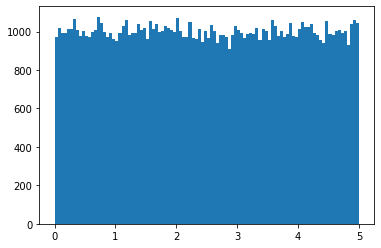

In [33]:
# Histogram

plt.hist(num, 100)
plt.show

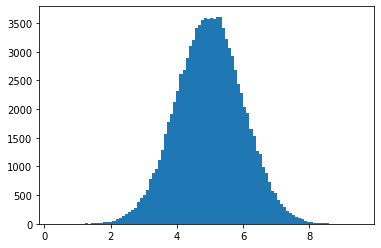

In [34]:
# Normal Data Distribution

x = np.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

# most values are between 4.0 and 6.0, with a top at approximately 5.0

<function matplotlib.pyplot.show(close=None, block=None)>

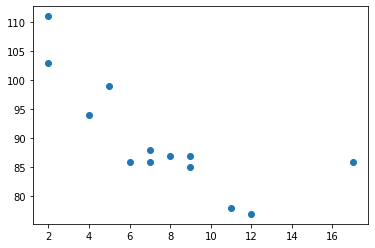

In [35]:
# Scatter Plot

x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6] # age of each car
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86] # speed of each car

plt.scatter(x, y)
plt.show

# two fastest cars were both 2 years old, and the slowest car was 12 years old

<function matplotlib.pyplot.show(close=None, block=None)>

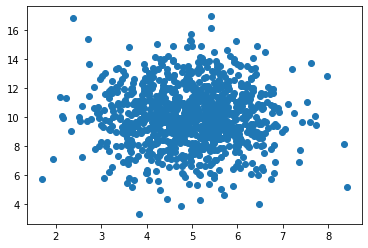

In [36]:
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show

-1.7512877115526118 103.10596026490066 -0.758591524376155 0.002646873922456106 0.453536157607742


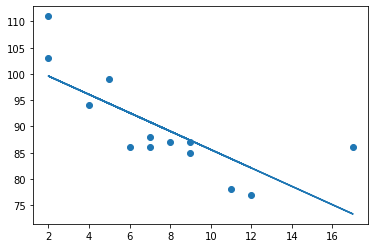

In [40]:
# Linear Regression

x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6] # age of each car
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86] # speed of each car

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(slope, intercept, r, p, std_err)
# The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

def myFunc(x) :
    return slope * x + intercept

myModel = list(map(myFunc, x))

# print(myModel)

plt.scatter(x, y)
plt.plot(x, myModel)
plt.show()

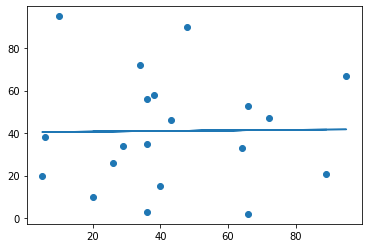

In [41]:
# Bad Fit for Linear Regression

x = [89, 43, 36, 36, 95, 10, 66, 34, 38, 20, 26, 29, 48, 64, 6, 5, 36, 66, 72, 40]
y = [21, 46, 3, 35, 67, 95, 53, 72, 58, 10, 26, 34, 90, 33, 38, 20, 56, 2, 47, 15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

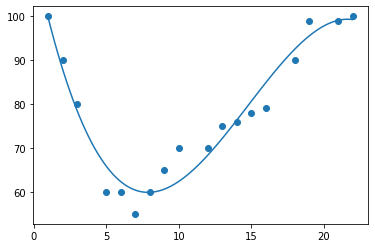

In [42]:
# Polynomial Regression

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [44]:
# R-Squared

print(r2_score(y, mymodel(x))) # The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

0.9432150416451026


In [45]:
speed = mymodel(17)
print(speed)

88.87331269697978


0.009952707566680652


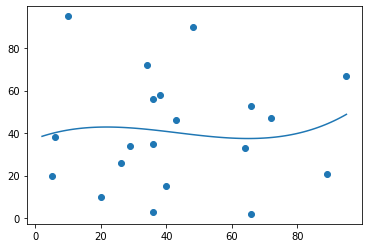

In [46]:
# Bad Fit for Polynomial Regression

x = [89, 43, 36, 36, 95, 10, 66, 34, 38, 20, 26, 29, 48, 64, 6, 5, 36, 66, 72, 40]
y = [21, 46, 3, 35, 67, 95, 53, 72, 58, 10, 26, 34, 90, 33, 38, 20, 56, 2, 47, 15]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(2, 95, 100)

print(r2_score(y, mymodel(x)))

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [53]:
# Multiple Regression

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']] # X = list of the independent values
y = df['CO2'] # y = dependent values


In [54]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [55]:
# Predict the CO2 emission of a car where the weight is 2300 kg and the volume is 1300 cm3 :

predictedCO2 = regr.predict([[2300, 1300]])

C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [56]:
print(predictedCO2)

[107.2087328]


In [57]:
# The coefficient is a factor that describes the relationship with an unknown variable.

print(regr.coef_)

# These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.
# And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

[0.00755095 0.00780526]


In [58]:
# Test coefficient

predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

# 107.2087328 + (1000 * 0.00755095) = 114.75968

[114.75968007]


C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
# Scale
# The standardization method uses this formula: z = (x - u) / s
# Where z is the new value, x is the original value, u is the mean and s is the standard deviation.

In [67]:
scale = StandardScaler()

df = pandas.read_csv("cars2.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

scaledX = scale.fit_transform(X)

# print(X)
# print(scaledX[0])

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[107.2087328]


C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [68]:
# Train/Test

# 80% for training, and 20% for testing

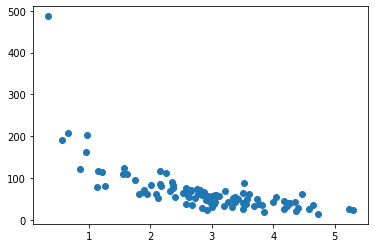

In [69]:
np.random.seed(2)

x = np.random.normal(3, 1, 100) # number of minutes before making a purchase
y = np.random.normal(150, 40, 100) / x # amount of money spent on the purchase

plt.scatter(x, y)
plt.show()

In [70]:
# Split Into Train/Test

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

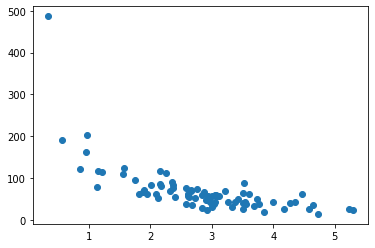

In [71]:
plt.scatter(train_x, train_y)
plt.show()

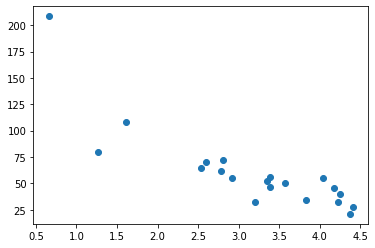

In [72]:
plt.scatter(test_x, test_y)
plt.show()

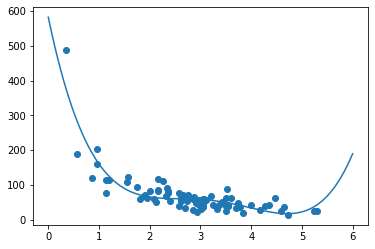

In [73]:
mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [74]:
r2 = r2_score(train_y, mymodel(train_x))
print(r2)

0.7988645544629795


In [75]:
r2 = r2_score(test_y, mymodel(test_x))
print(r2)

0.8086921460343666


In [76]:
print(mymodel(5))
# The example predicted the customer to spend 22.88 dollar in 5 minutes

22.879625918120155


In [78]:
# Decision Tree

In [ ]:
df = pandas.read_csv('shows.csv')

print(df)

In [ ]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

In [ ]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
print(dtree.predict([[40, 10, 7, 1]]))

print(dtree.predict([[40, 10, 6, 1]]))